In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from datetime import datetime
from datetime import timedelta, date
import numpy.linalg
quandl.ApiConfig.api_key= '1ssLPs8xYzykLMyAj-je'#MY KEY, GET YOUR OWN

In [3]:
df = pd.read_csv("constituents.csv")

In [4]:
tickers = df["Symbol"][:50]#tickers in this csv

In [82]:
price_df = pd.DataFrame()
for ticker in tickers:
    price_df[ticker] = quandl.get("WIKI/" + ticker, start_date=str(datetime(2004, 1, 1).date()), end_date = str(date.today()))["Close"]

In [100]:
def portfolio_corr(t_weights, stock, M):
    """ t_weights is a TICKER, WEIGHT value pair representing the weight of TICKER in input portfolio """ 
    return sum([M.loc[stock, ticker]*t_weights[ticker] for ticker in t_weights])
def annual_variance(ticker, M):
    """ M is a timeseries matrix"""
    year_list = price_df.index.tolist()
    M['year'] = list(map(lambda x: x.to_pydatetime().year, year_list))
    return M.groupby('year')[ticker].var()
def annual_expected_return(ticker, M):
    year_list = price_df.index.tolist()
    M['year'] = list(map(lambda x: x.to_pydatetime().year, year_list))
    return M.groupby('year')[ticker].mean()
def portfolio_expected_return(t_weights, M):
    year_list = price_df.index.tolist()
    M['year'] = list(map(lambda x: x.to_pydatetime().year, year_list))
    res = 0
    for stock in t_weights:      
        x = M.groupby('year')[stock].mean()
        res += ((x[2017] - x[2016]) / x[2016]) * t_weights[stock]
    return res
def portfolio_variance(t_weights, M):
    


In [102]:
M = price_df.dropna().corr()
portfolio = {"ABT":0.5, "ACN": 0.5}
X = {}
Y = {}
p_return = portfolio_expected_return(t_weights, M)
for ticker in tickers:
    corr = portfolio_corr(portfolio, ticker, M)
    year_var = annual_variance(ticker, price_df)[2017]
    expected_return = annual_expected_return(ticker, price_df)
    expected_return = (expected_return[2017] - expected_return[2016]) / expected_return[2016]
    X[ticker] = [corr, year_var ** (1/2)]
    Y[ticker] = [expected_return, year_var ** (1/2)]
data_df = pd.DataFrame(X)
nxt_data_df = pd.DataFrame(Y)

In [63]:
annual_variance("ABT", price_df)

year
2004     3.759715
2005     9.410574
2006     7.581906
2007     5.296434
2008     6.555426
2009    16.554360
2010     7.640215
2011     6.826904
2012    18.323205
2013     2.692020
2014     5.649396
2015     6.952215
2016     4.917740
2017    13.119075
Name: ABT, dtype: float64

In [98]:
annual_expected_return("ABT", price_df)

year
2004    42.356151
2005    45.370000
2006    45.028390
2007    54.419323
2008    55.162451
2009    48.428770
2010    50.732024
2011    51.065595
2012    62.759160
2013    35.654008
2014    40.959246
2015    46.306270
2016    40.494643
2017    46.405208
Name: ABT, dtype: float64


In [108]:
X = []
for key in nxt_data_df:
    X.append(np.array(nxt_data_df[key]))
X = np.array(X)
U, s, V = np.linalg.svd(X, full_matrices=True)

array([[ 0.00622718,  0.99998061],
       [ 0.99998061, -0.00622718]])

In [90]:
plot_df = pd.DataFrame({'corr': data_df.iloc[0], 'sigma': data_df.iloc[1]})
plot_df.head()

,corr,sigma
A,0.169228,5.502800
AAL,0.328019,3.064794
AAP,-0.101196,26.146295
AAPL,-0.228266,11.899887
ABBV,0.673492,7.603870


In [94]:
plot_df.corr()

,corr,sigma
corr,1.00000,0.11704
sigma,0.11704,1.00000


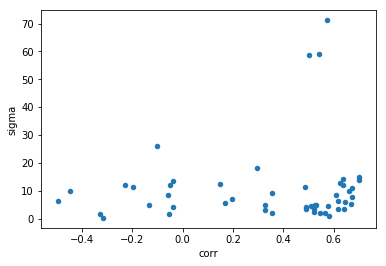

In [95]:
plot_df.plot(kind='scatter', x='corr', y='sigma')
plt.show()